### ***Problem06***
---

In [ ]:
### Import library & data set 
# library
from google.colab import drive
drive.mount("/content/drive") 
import queue
import random
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sys
sys.setrecursionlimit(10000)
# df
blobs = "/content/drive/MyDrive/DS5230_Unsupervised Machine Learning/Assignments/HW02B/blobs.csv"
circle = "/content/drive/MyDrive/DS5230_Unsupervised Machine Learning/Assignments/HW02B/circle.csv"
moons = "/content/drive/MyDrive/DS5230_Unsupervised Machine Learning/Assignments/HW02B/moons.csv"
def to_dataframe(df):
  df = pd.read_csv(df)
  df = pd.DataFrame(df) 
  return df
blobs = to_dataframe(blobs)
circle = to_dataframe(circle) 
moons = to_dataframe(moons) 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### dbscan 
# point, coordinate, and cluster_idx
class Point():
    def __init__(self, coordinate):
        self.coordinate = coordinate
        self.cluster_idx = None
        
    # disignate cluster 
    def cluster(self, cluster_idx):
        self.cluster_idx = cluster_idx

# dbscan main
class dbscan():
    def __init__(self, epsi, min_points):
        self.epsi = epsi
        self.min_points = min_points
    
    def get_distnace(self, x1, x2):
        return np.sum((x1 - x2)**2)**0.5

    def find_neighbor(self, core_point, other_points):
        neighbor_indices = []
        
        for idx in range(len(other_points)):
          if self.get_distnace(core_point.coordinate, other_points[idx].coordinate) <= self.epsi:
                neighbor_indices.append(idx)  
        return neighbor_indices

    # Get all points of df
    def fit(self, df, feature_cols):
        points = []
        for idx, row in df.loc[:, feature_cols].iterrows():
          """x1 be index, x2 be row"""
          points.append(Point(row.to_numpy()))

        # free, core points for while function                    
        free_point_indices = set(range(len(points)))
        core_point_indices = set()
        cluster_count = 0

        # dicriminate value into cluster 
        while len(free_point_indices) > 0:
            """random for initiate"""
            if len(core_point_indices) == 0:
                start_idx = random.choice(list(free_point_indices))
                core_point_indices.add(start_idx)
                free_point_indices.remove(start_idx)
                points[start_idx].cluster(cluster_count)

            while len(core_point_indices) > 0:
                picked_core_point_idx = core_point_indices.pop()
                neighbor_indices = self.find_neighbor(points[picked_core_point_idx], points)
                if len(neighbor_indices) >= (self.min_points - 1):
                    for neighbor_idx in neighbor_indices:
                        if neighbor_idx in free_point_indices:
                            points[neighbor_idx].cluster(cluster_count)
                            if neighbor_idx in free_point_indices:
                                core_point_indices.add(neighbor_idx)
                                free_point_indices.remove(neighbor_idx)      
            cluster_count += 1
        return points

<Axes: xlabel='Xblobs_X1', ylabel='Xblobs_X2'>

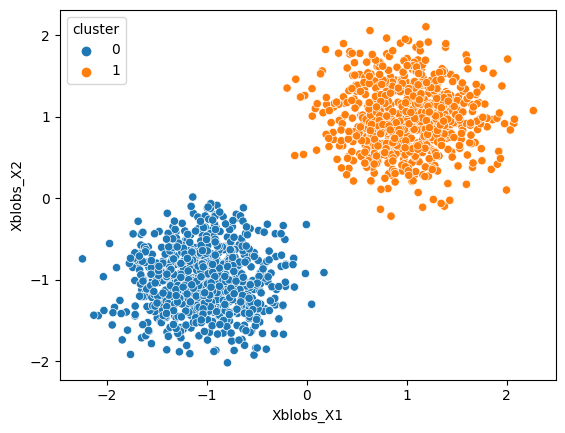

In [ ]:
### blob
# fitting
model = dbscan(epsi=0.4, min_points=3)
points = model.fit(blobs, ["Xblobs_X1","Xblobs_X2"])
x = []
y = []
cluster = []
for point in points:
    _x, _y = point.coordinate
    x.append(_x)
    y.append(_y)
    cluster.append(point.cluster_idx)
blobs_result = pd.DataFrame({
    'Xblobs_X1': x,
    'Xblobs_X2': y,
    'cluster': cluster
})
# plt result
sns.scatterplot(data=blobs_result, x="Xblobs_X1", y="Xblobs_X2", hue="cluster") 

<Axes: xlabel='Xcircle_X1', ylabel='Xcircle_X2'>

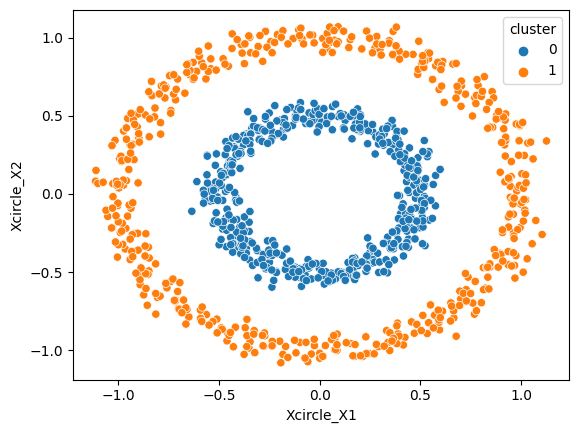

In [ ]:
### circle
# fitting
model_circle = dbscan(epsi=0.2, min_points=3)
points = model_circle.fit(circle, ["Xcircle_X1","Xcircle_X2"])
x = []
y = []
cluster = []
for point in points:
    _x, _y = point.coordinate
    x.append(_x)
    y.append(_y)
    cluster.append(point.cluster_idx)
circle_result = pd.DataFrame({
    'Xcircle_X1': x,
    'Xcircle_X2': y,
    'cluster': cluster
})
# plt result
sns.scatterplot(data=circle_result, x="Xcircle_X1", y="Xcircle_X2", hue="cluster") 

<Axes: xlabel='Xmoons_X1', ylabel='Xmoons_X2'>

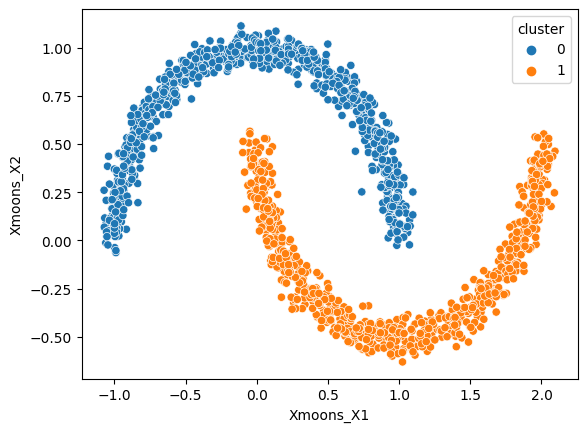

In [ ]:
### moons
# fitting
model_moons = dbscan(epsi=0.2, min_points=3)
points = model_moons.fit(moons, ["Xmoons_X1","Xmoons_X2"])
x = []
y = []
cluster = []
for point in points:
    _x, _y = point.coordinate
    x.append(_x)
    y.append(_y)
    cluster.append(point.cluster_idx)
moons_result = pd.DataFrame({
    'Xmoons_X1': x,
    'Xmoons_X2': y,
    'cluster': cluster
})
# plt result
sns.scatterplot(data=moons_result, x="Xmoons_X1", y="Xmoons_X2", hue="cluster") 